<a href="https://colab.research.google.com/github/RareDiseaseData/rd_simulations/blob/main/try1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('/TRY1.csv')
df

,ID,Author,Year,Title,Cell 1,Cell2,Age,Sex,OI Type,n,Contains std,type of comparaison,Method,Control vs patient vs aggregate,Measurement,% hydroxylysine,STD1
0,6,"Bleckmann, H.;Kresse, H.;Wollensak, J.;Buddeck...",1971,[Glycosaminoglycan and collagen analyses in os...,2,2,2,1,9,NaN,No,1,1.0,1,1,0.465116,NaN
1,8,"Eastoe, J. E.;Martens, P.;Thomas, N. R.",1973,The amino-acid composition of human hard tissu...,2,3,1,1,2,3.0,No,1,2.0,1,1,0.219020,0.083326
2,15,"Trelstad, R. L.;Rubin, D.;Gross, J.",1977,Osteogenesis imperfecta congenita: evidence fo...,1,1,1,2,2,NaN,No,2,5.0,1,1,0.218750,NaN
3,15,"Trelstad, R. L.;Rubin, D.;Gross, J.",1977,Osteogenesis imperfecta congenita: evidence fo...,2,2,1,2,2,NaN,No,2,3.0,1,1,0.371429,NaN
4,15,"Trelstad, R. L.;Rubin, D.;Gross, J.",1978,Osteogenesis imperfecta congenita: evidence fo...,2,3,1,2,2,NaN,No,2,3.0,1,1,0.352941,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,No,3,5.0,1,1,0.370504,NaN
65,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,No,3,5.0,1,1,0.412710,NaN
66,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,No,3,5.0,1,1,0.423261,NaN
67,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,No,3,5.0,1,1,0.425180,NaN


In [6]:
df.columns

Index(['ID', 'Author', 'Year', 'Title', 'Cell 1', 'Cell2', 'Age', 'Sex',
       'OI Type', 'n', 'Contains std', 'type of comparaison', 'Method',
       'Control vs patient vs aggregate', 'Measurement', '% hydroxylysine',
       'STD1'],
      dtype='object')

In [7]:
df_clean = df[['Cell 1',
                'Age',
                'Sex',
                'OI Type', # disease_severity; one hot encoding
                'n',
                'Method', # one hot enconding
                '% hydroxylysine',
               'STD1']] 

df_clean

,Cell 1,Age,Sex,OI Type,n,Method,% hydroxylysine,STD1
0,2,2,1,9,NaN,1.0,0.465116,NaN
1,2,1,1,2,3.0,2.0,0.219020,0.083326
2,1,1,2,2,NaN,5.0,0.218750,NaN
3,2,1,2,2,NaN,3.0,0.371429,NaN
4,2,1,2,2,NaN,3.0,0.352941,NaN
...,...,...,...,...,...,...,...,...
64,1,5,3,4,NaN,5.0,0.370504,NaN
65,1,5,3,4,NaN,5.0,0.412710,NaN
66,1,5,3,4,NaN,5.0,0.423261,NaN
67,1,5,3,4,NaN,5.0,0.425180,NaN


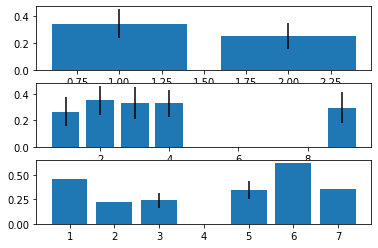

In [9]:
import numpy as np
grouped_bycell = df.groupby('Cell 1')['% hydroxylysine'].agg([np.mean, np.std])
grouped_bytype = df.groupby('OI Type')['% hydroxylysine'].agg([np.mean, np.std])
grouped_bymethod = df.groupby('Method')['% hydroxylysine'].agg([np.mean, np.std])
fig, ax = plt.subplots(3,1)
ax[0].bar(grouped_bycell.index, grouped_bycell['mean'], yerr=grouped_bycell['std'])
ax[1].bar(grouped_bytype.index, grouped_bytype['mean'], yerr=grouped_bytype['std'])
ax[2].bar(grouped_bymethod.index, grouped_bymethod['mean'], yerr=grouped_bymethod['std'])
plt.show()

In [10]:
std_data = df_clean.groupby('OI Type')['% hydroxylysine'].std()
for category, std in std_data.iteritems():
    print(f"Standard deviation for category '{category}': {std:.5f}")

Standard deviation for category '1': 0.10869
Standard deviation for category '2': 0.10668
Standard deviation for category '3': 0.12030
Standard deviation for category '4': 0.10197
Standard deviation for category '9': 0.11969


In [18]:
df_clean["% hydroxylysine"].std()

0.11033564355789746

In [11]:
import random
mean = 0.11
min_value = 0.095
max_value = 0.125
std_deviation = (max_value - mean) / 3.0
num_rows = df_clean.shape[0]
sim_std = [random.normalvariate(mean, std_deviation) for _ in range(num_rows)]
sim_std = [min(max(x, min_value), max_value) for x in sim_std]
df_clean['STDsim'] = pd.Series(sim_std)
print(sim_std)
print(df_clean.head)

[0.11808517303945808, 0.10710756225651104, 0.11433820623751964, 0.10895676293418943, 0.1146375222796279, 0.10222579181751833, 0.10883255499169368, 0.11738148927910282, 0.11301041206962231, 0.11453918841218798, 0.11496382472267219, 0.1075385200385227, 0.11211285617598044, 0.10520522662017578, 0.12053027433593239, 0.10878031361811269, 0.11079968609614692, 0.11502393929067078, 0.10582692025793235, 0.11189093022991721, 0.10906800193379641, 0.10155577366245942, 0.10749571277460783, 0.11336834496698024, 0.10880028465492475, 0.11304276566816468, 0.10906612495285392, 0.10911100969256156, 0.10912950323171443, 0.11146742984384686, 0.10907176757436046, 0.11713506877186576, 0.11853322038974695, 0.10971021913084365, 0.10977873386487744, 0.11919489167987897, 0.11368307099985038, 0.11364638277825562, 0.11250676076676387, 0.125, 0.10458175368038794, 0.10886054798656428, 0.10385050530356618, 0.10772740783206004, 0.10090475176921074, 0.1104136648278391, 0.11062333561989489, 0.11473534904761941, 0.110572

<ipython-input-11-27361f5c088f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['STDsim'] = pd.Series(sim_std)


In [12]:
df_clean.isna().sum()

Cell 1              0
Age                 0
Sex                 0
OI Type             0
n                  56
Method              3
% hydroxylysine     0
STD1               56
STDsim              0
dtype: int64

In [13]:
df_clean.loc[df_clean.n.isna(), 'n'] = 1
df_clean.isna().sum()
df_clean = df_clean.dropna() # equivalent df_sel.dropna(inplace = True)
df_clean.isna().sum()

Cell 1             0
Age                0
Sex                0
OI Type            0
n                  0
Method             0
% hydroxylysine    0
STD1               0
STDsim             0
dtype: int64

In [32]:
df_clean = df[['Cell 1',
                'Age',
                'Sex',
                'OI Type', # disease_severity; one hot encoding
                'n',
                'Method', # one hot enconding
                '% hydroxylysine',
               "STD1"]] 

In [33]:
df_clean = df_clean.rename(columns={'OI Type': 'ds'})
df_clean

,Cell 1,Age,Sex,ds,n,Method,% hydroxylysine,STD1
0,2,2,1,9,NaN,1.0,0.465116,NaN
1,2,1,1,2,3.0,2.0,0.219020,0.083326
2,1,1,2,2,NaN,5.0,0.218750,NaN
3,2,1,2,2,NaN,3.0,0.371429,NaN
4,2,1,2,2,NaN,3.0,0.352941,NaN
...,...,...,...,...,...,...,...,...
64,1,5,3,4,NaN,5.0,0.370504,NaN
65,1,5,3,4,NaN,5.0,0.412710,NaN
66,1,5,3,4,NaN,5.0,0.423261,NaN
67,1,5,3,4,NaN,5.0,0.425180,NaN


In [34]:
df_clean.isna().sum()
df_clean.loc[df_clean.n.isna(), 'n'] = 1
df_clean.isna().sum()
df_clean.loc[df_clean.n.isna(), 'n'] = 1
df_clean.loc[df_clean.Method.isna(), 'Method'] = 3
df_clean.isna().sum()
df_clean

,Cell 1,Age,Sex,ds,n,Method,% hydroxylysine,STD1
0,2,2,1,9,1.0,1.0,0.465116,NaN
1,2,1,1,2,3.0,2.0,0.219020,0.083326
2,1,1,2,2,1.0,5.0,0.218750,NaN
3,2,1,2,2,1.0,3.0,0.371429,NaN
4,2,1,2,2,1.0,3.0,0.352941,NaN
...,...,...,...,...,...,...,...,...
64,1,5,3,4,1.0,5.0,0.370504,NaN
65,1,5,3,4,1.0,5.0,0.412710,NaN
66,1,5,3,4,1.0,5.0,0.423261,NaN
67,1,5,3,4,1.0,5.0,0.425180,NaN


In [35]:
# Convert disease_severity and method values into integers
df_clean.ds = df_clean.ds.astype(int)
df_clean.Method = df_clean.Method.astype(int)

# One Hot Encoding
df_ds_dummies = pd.get_dummies(df_clean.ds, prefix='OI Type')
df_method_dummies = pd.get_dummies(df_clean.Method, prefix='Method')

df_clean.join(df_ds_dummies).join(df_method_dummies)

,Cell 1,Age,Sex,ds,n,Method,% hydroxylysine,STD1,OI Type_1,OI Type_2,OI Type_3,OI Type_4,OI Type_9,Method_1,Method_2,Method_3,Method_5,Method_6,Method_7
0,2,2,1,9,1.0,1,0.465116,NaN,0,0,0,0,1,1,0,0,0,0,0
1,2,1,1,2,3.0,2,0.219020,0.083326,0,1,0,0,0,0,1,0,0,0,0
2,1,1,2,2,1.0,5,0.218750,NaN,0,1,0,0,0,0,0,0,1,0,0
3,2,1,2,2,1.0,3,0.371429,NaN,0,1,0,0,0,0,0,1,0,0,0
4,2,1,2,2,1.0,3,0.352941,NaN,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,5,3,4,1.0,5,0.370504,NaN,0,0,0,1,0,0,0,0,1,0,0
65,1,5,3,4,1.0,5,0.412710,NaN,0,0,0,1,0,0,0,0,1,0,0
66,1,5,3,4,1.0,5,0.423261,NaN,0,0,0,1,0,0,0,0,1,0,0
67,1,5,3,4,1.0,5,0.425180,NaN,0,0,0,1,0,0,0,0,1,0,0


In [39]:
df_train = df_clean[df_clean.STD1 != 0]
df_train

,Cell 1,Age,Sex,ds,n,Method,% hydroxylysine,STD1
0,2,2,1,9,1.0,1,0.465116,NaN
1,2,1,1,2,3.0,2,0.219020,0.083326
2,1,1,2,2,1.0,5,0.218750,NaN
3,2,1,2,2,1.0,3,0.371429,NaN
4,2,1,2,2,1.0,3,0.352941,NaN
...,...,...,...,...,...,...,...,...
64,1,5,3,4,1.0,5,0.370504,NaN
65,1,5,3,4,1.0,5,0.412710,NaN
66,1,5,3,4,1.0,5,0.423261,NaN
67,1,5,3,4,1.0,5,0.425180,NaN


In [40]:
df_train2 = df_clean.dropna(subset=['STD1'])
df_train2

,Cell 1,Age,Sex,ds,n,Method,% hydroxylysine,STD1
1,2,1,1,2,3.0,2,0.219020,0.083326
5,1,1,1,2,2.0,5,0.294000,0.009016
7,2,2,2,3,4.0,3,0.252078,0.027212
15,1,2,3,1,3.0,5,0.129901,0.008515
16,1,1,3,2,5.0,5,0.260990,0.015050
17,1,5,3,3,12.0,5,0.140198,0.020990
18,1,5,3,4,3.0,5,0.121188,0.010495
19,2,2,3,1,3.0,3,0.134257,0.010693
20,2,1,3,2,5.0,3,0.271683,0.021782
21,2,5,3,3,12.0,3,0.114455,0.016634


In [41]:
X = df_train2[[
  'Cell 1',
  'Age',
  'Sex',
  'ds',
  'n',
  'Method',
  '% hydroxylysine'
]]
X

,Cell 1,Age,Sex,ds,n,Method,% hydroxylysine
1,2,1,1,2,3.0,2,0.219020
5,1,1,1,2,2.0,5,0.294000
7,2,2,2,3,4.0,3,0.252078
15,1,2,3,1,3.0,5,0.129901
16,1,1,3,2,5.0,5,0.260990
17,1,5,3,3,12.0,5,0.140198
18,1,5,3,4,3.0,5,0.121188
19,2,2,3,1,3.0,3,0.134257
20,2,1,3,2,5.0,3,0.271683
21,2,5,3,3,12.0,3,0.114455


In [44]:
Y = df_train2[['STD1']]
Y

,STD1
1,0.083326
5,0.009016
7,0.027212
15,0.008515
16,0.015050
17,0.020990
18,0.010495
19,0.010693
20,0.021782
21,0.016634


In [45]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X = X, y = Y)


LinearRegression()

In [46]:
reg.coef_

array([[-0.10226368,  0.01039983, -0.00375541, -0.0127058 , -0.0001783 ,
        -0.05592253,  0.16519261]])